## Name:Glory Ogor 
## Student number:501071794

## Import Modules

In [1]:
!pip install ruamel.yaml


In [2]:
pip install pandas-profiling


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install markupsafe==2.1.1

In [4]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [5]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install plotly
!pip install cufflinks
!pip install textblob

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import nltk
import re
import seaborn as sns
import warnings
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
%matplotlib inline

warnings.filterwarnings('ignore')

## Loading Dataset

In [8]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
df = pd.read_csv('amazon_alexa.csv')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## EDA

In [10]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [12]:
df.shape

(3150, 5)

In [13]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [14]:
df.info

<bound method DataFrame.info of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                

In [15]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [16]:
#3. Are there any missing values in the dataset?
df.isnull().sum()


rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

Text(0.5, 1.0, 'Number of Unique Values of each Feature ')

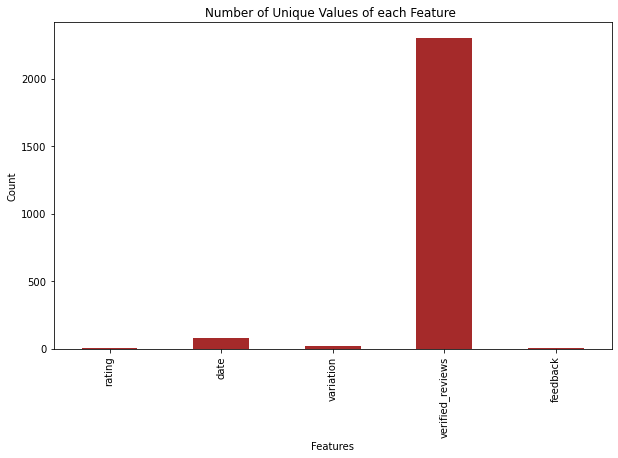

In [17]:
#Number of unique values of each column
df.nunique().plot(kind='bar', figsize=(10,6), color='brown')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Number of Unique Values of each Feature ')


<AxesSubplot:xlabel='rating', ylabel='count'>

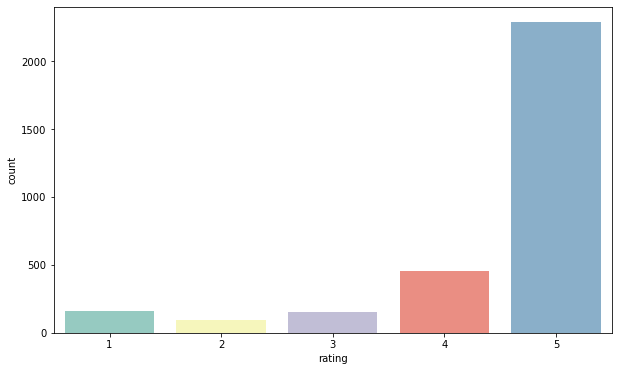

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df['rating'],palette='Set3')

Text(0, 0.5, 'Count')

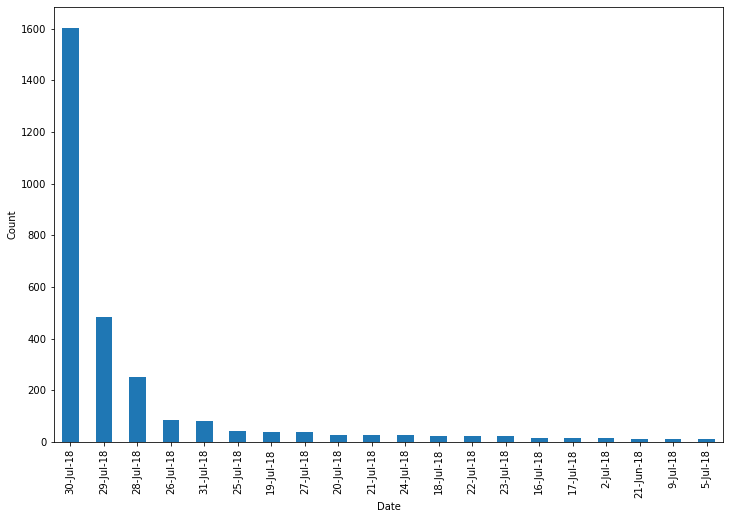

In [19]:
df['date'].value_counts()[:20].plot(kind='bar',figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Count')

#there are a lot of customer reviews written on july 30

[Text(0, 0, 'Charcoal Fabric '),
 Text(1, 0, 'Walnut Finish '),
 Text(2, 0, 'Heather Gray Fabric '),
 Text(3, 0, 'Sandstone Fabric '),
 Text(4, 0, 'Oak Finish '),
 Text(5, 0, 'Black'),
 Text(6, 0, 'White'),
 Text(7, 0, 'Black  Spot'),
 Text(8, 0, 'White  Spot'),
 Text(9, 0, 'Black  Show'),
 Text(10, 0, 'White  Show'),
 Text(11, 0, 'Black  Plus'),
 Text(12, 0, 'White  Plus'),
 Text(13, 0, 'Configuration: Fire TV Stick'),
 Text(14, 0, 'Black  Dot'),
 Text(15, 0, 'White  Dot')]

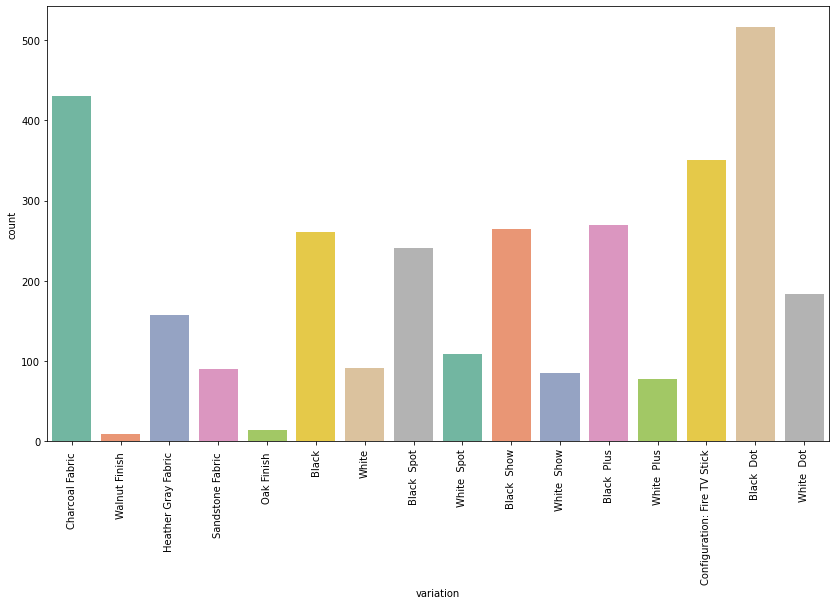

In [20]:
plt.figure(figsize=(14,8))
barplot=sns.countplot(df['variation'], palette='Set2')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)

<AxesSubplot:xlabel='feedback', ylabel='count'>

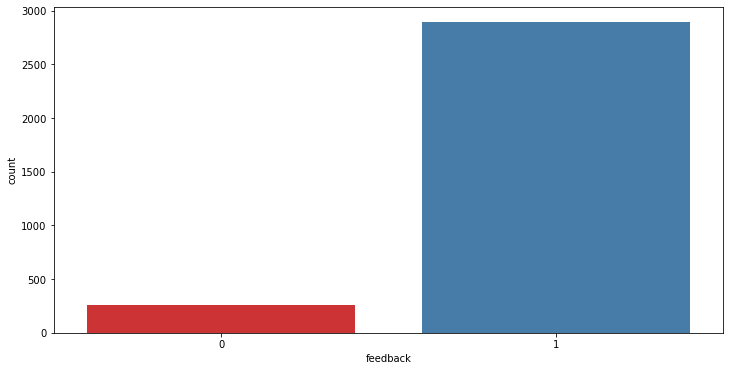

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(df['feedback'], palette='Set1')

In [22]:
df.values

array([[5, '31-Jul-18', 'Charcoal Fabric ', 'Love my Echo!', 1],
       [5, '31-Jul-18', 'Charcoal Fabric ', 'Loved it!', 1],
       [4, '31-Jul-18', 'Walnut Finish ',
        'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
        1],
       ...,
       [5, '30-Jul-18', 'Black  Dot',
        'I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems.',
        1],
       [5, '30-Jul-18', 'White  Dot',
        "Only complaint I have is that the sound quality isn

<AxesSubplot:xlabel='rating', ylabel='count'>

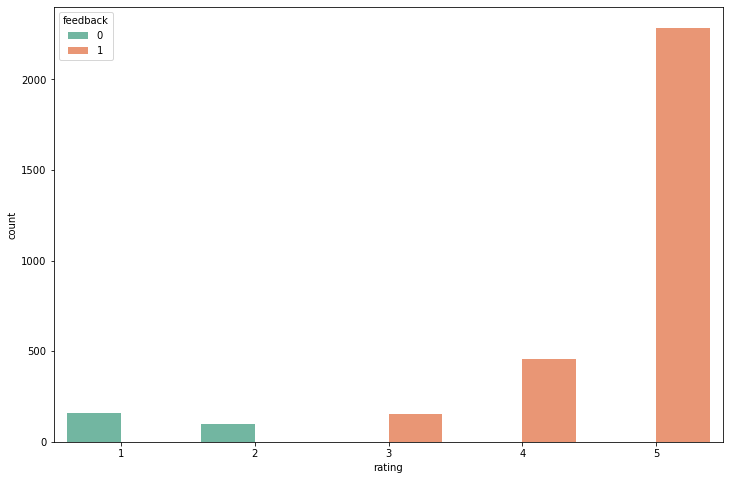

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(df['rating'], hue=df['feedback'], palette='Set2')

[Text(0, 0, 'Charcoal Fabric '),
 Text(1, 0, 'Walnut Finish '),
 Text(2, 0, 'Heather Gray Fabric '),
 Text(3, 0, 'Sandstone Fabric '),
 Text(4, 0, 'Oak Finish '),
 Text(5, 0, 'Black'),
 Text(6, 0, 'White'),
 Text(7, 0, 'Black  Spot'),
 Text(8, 0, 'White  Spot'),
 Text(9, 0, 'Black  Show'),
 Text(10, 0, 'White  Show'),
 Text(11, 0, 'Black  Plus'),
 Text(12, 0, 'White  Plus'),
 Text(13, 0, 'Configuration: Fire TV Stick'),
 Text(14, 0, 'Black  Dot'),
 Text(15, 0, 'White  Dot')]

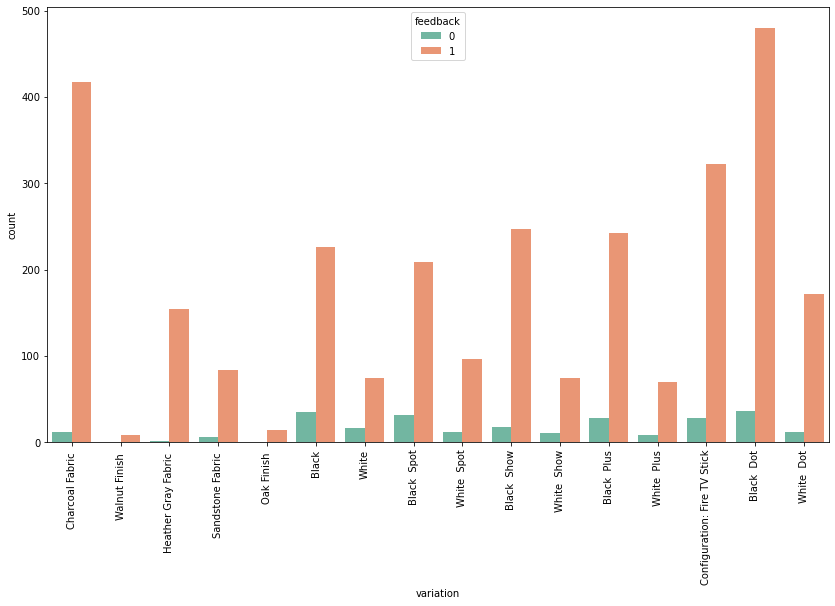

In [24]:
plt.figure(figsize=(14,8))
barplot=sns.countplot(df['variation'],hue=df['feedback'], palette='Set2')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)

In [25]:
#Length of the string of verified reviews
df['length']=df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:xlabel='length'>

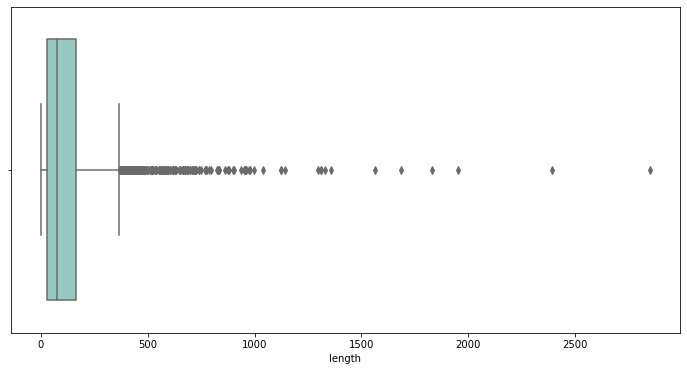

In [26]:
#box plot on length of reviews
plt.figure(figsize=(12,6))
sns.boxplot(df['length'], palette='Set3')

In [27]:
maximum_length=max(df['length'])
print('Maximum length Review from overall verified reviews is: ',maximum_length)

Maximum length Review from overall verified reviews is:  2851


In [28]:
df[df['length']==2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [29]:
df['lenght'] = df['verified_reviews'].apply(len)
df.groupby('lenght').describe().sample(10)


rating                                                feedback  \
        count      mean       std  min   25%  50%   75%  max    count   
lenght                                                                  
795       1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0      1.0   
75       19.0  4.578947  1.070607  1.0  5.00  5.0  5.00  5.0     19.0   
431       1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0      1.0   
1686      1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0      1.0   
251       2.0  3.000000  0.000000  3.0  3.00  3.0  3.00  3.0      2.0   
148       7.0  4.714286  0.487950  4.0  4.50  5.0  5.00  5.0      7.0   
268       3.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      3.0   
16       28.0  4.321429  1.278123  1.0  4.00  5.0  5.00  5.0     28.0   
674       2.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      2.0   
438       2.0  2.500000  2.121320  1.0  1.75  2.5  3.25  4.0      2.0   

                  ...            length                                       \
            mean  ...   75%  max  count    mean  std     min     25%     50%   
lenght            ...                                                          
795     0.000000  ...  0.00  0.0    1.0   795.0  NaN   795.0   795.0   795.0   
75      0.947368  ...  1.00  1.0   19.0    75.0  0.0    75.0    75.0    75.0   
431     1.000000  ...  1.00  1.0    1.0   431.0  NaN   431.0   431.0   431.0   
1686    0.000000  ...  0.00  0.0    1.0  1686.0  NaN  1686.0  1686.0  1686.0   
251     1.000000  ...  1.00  1.0    2.0   251.0  0.0   251.0   251.0   251.0   
148     1.000000  ...  1.00  1.0    7.0   148.0  0.0   148.0   148.0   148.0   
268     1.000000  ...  1.00  1.0    3.0   268.0  0.0   268.0   268.0   268.0   
16      0.892857  ...  1.00  1.0   28.0    16.0  0.0    16.0    16.0    16.0   
674     1.000000  ...  1.00  1.0    2.0   674.0  0.0   674.0   674.0   674.0   
438     0.500000  ...  0.75  1.0    2.0   438.0  0.0   438.0   438.0   438.0   

                        
           75%     max  
lenght                  
795      795.0   795.0  
75        75.0    75.0  
431      431.0   431.0  
1686    1686.0  1686.0  
251      251.0   251.0  
148      148.0   148.0  
268      268.0   268.0  
16        16.0    16.0  
674      674.0   674.0  
438      438.0   438.0  

[10 rows x 24 columns]

In [30]:
df[df['length']==2851]['feedback'].iloc[0]

1

In [31]:
positive_feedbacks=df[df['feedback']==1]['verified_reviews']
negative_feedbacks=df[df['feedback']==0]['verified_reviews']

Text(0.5, 1.0, 'Positive Feedback Reviews')

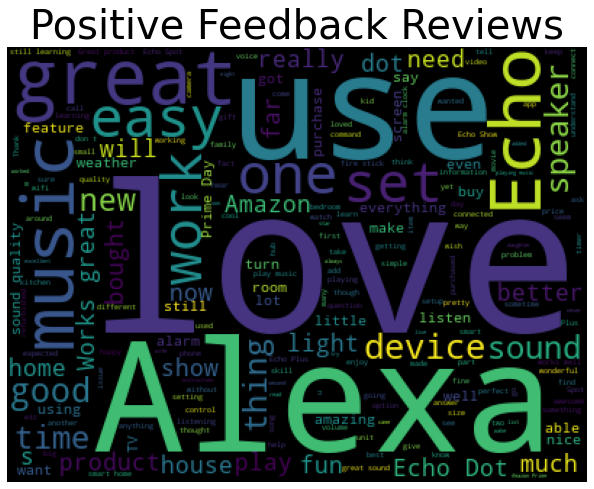

In [32]:
from wordcloud import WordCloud
plt.figure(figsize=(14,8))
wordcloud1=WordCloud(width=400,height=300, contour_color='black').generate(' '.join(positive_feedbacks))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Positive Feedback Reviews',fontsize=40)

Text(0.5, 1.0, 'Negative Feedback Reviews')

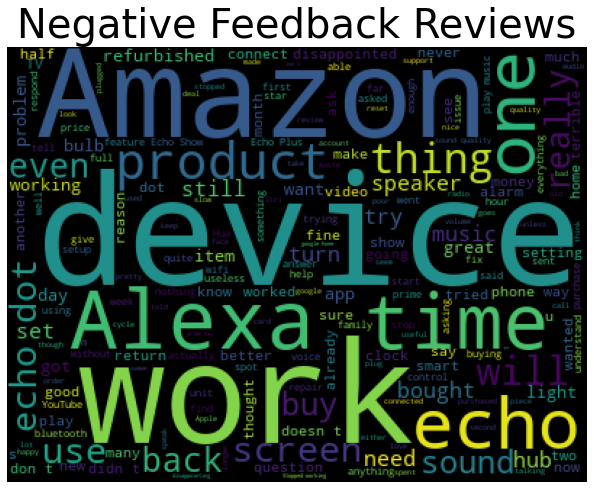

In [33]:
#Word Cloud for Negative feedback reviews
plt.figure(figsize=(14,8))
wordcloud2=WordCloud(width=400,height=300, contour_color='black').generate(' '.join(negative_feedbacks))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('Negative Feedback Reviews',fontsize=40)

In [34]:
#Removing leading and ending spaces of string
df['verified_reviews']=df['verified_reviews'].apply(lambda x: x.strip())

In [35]:
#Text Lowercasing
df['verified_reviews']=df['verified_reviews'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df['verified_reviews'].head()


0                                        love my echo!
1                                            loved it!
2    sometimes while playing a game, you can answer...
3    i have had a lot of fun with this thing. my 4 ...
4                                                music
Name: verified_reviews, dtype: object

In [36]:
#Removing Stop Words
from nltk.corpus import stopwords
stop=stopwords.words('english')
print(len(stop))
df['verified_reviews']=df['verified_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['verified_reviews'].head()

179


0                                           love echo!
1                                            loved it!
2    sometimes playing game, answer question correc...
3    lot fun thing. 4 yr old learns dinosaurs, cont...
4                                                music
Name: verified_reviews, dtype: object

In [37]:
#Removing Numbers
df['verified_reviews']=df['verified_reviews'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df['verified_reviews'].head()

0                                           love echo!
1                                            loved it!
2    sometimes playing game, answer question correc...
3    lot fun thing.  yr old learns dinosaurs, contr...
4                                                music
Name: verified_reviews, dtype: object

In [38]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
df['verified_reviews']=df['verified_reviews'].apply(lambda x: ''.join(lem.lemmatize(term) for term in x))
df['verified_reviews'].head()

0                                           love echo!
1                                            loved it!
2    sometimes playing game, answer question correc...
3    lot fun thing.  yr old learns dinosaurs, contr...
4                                                music
Name: verified_reviews, dtype: object

In [39]:
#Removing URL's
df['verified_reviews'] = df['verified_reviews'].str.replace('http\S+|www.\S+','',case=False)
df['verified_reviews'].head()

0                                           love echo!
1                                            loved it!
2    sometimes playing game, answer question correc...
3    lot fun thing.  yr old learns dinosaurs, contr...
4                                                music
Name: verified_reviews, dtype: object

## Text Preprocessing

In [40]:
#List of Tokens-Tokenization
from nltk.tokenize import word_tokenize
all_words=[]
for msg in df['verified_reviews']:
    words=word_tokenize(msg)
    for w in words:
        all_words.append(w)

In [41]:
#Frequency of Most Common Words
import nltk
frequency_dist=nltk.FreqDist(all_words)
print('Length of the words',len(frequency_dist))
print('Most Common Words',frequency_dist.most_common(100))

Length of the words 4282
Most Common Words [('.', 5094), (',', 2128), ('!', 1376), ('love', 953), ('echo', 829), ('great', 720), ('it', 678), ('alexa', 625), ('music', 537), ('’', 506), ('like', 501), ('use', 468), ('works', 381), ('one', 347), ('i', 347), ('easy', 339), ('sound', 338), ('set', 297), ('dot', 283), ('good', 273), ('amazon', 254), ('product', 251), ('&', 248), ('get', 243), (';', 240), ('speaker', 239), ('t', 221), ('#', 220), ('would', 218), ('home', 215), ('play', 215), ('device', 213), ('still', 204), ('time', 196), ('really', 193), ('bought', 189), ('smart', 184), ('new', 176), ('better', 175), ('much', 172), ('prime', 168), ('also', 168), ('quality', 166), ('well', 159), ('s', 157), ('work', 154), ('day', 153), ('fun', 152), ('...', 152), ("'m", 151), ('show', 150), ('things', 145), ('far', 145), (')', 144), ('even', 136), ('got', 133), ('devices', 132), ('thing', 128), ('(', 128), ('room', 126), ('tv', 121), ('everything', 120), ('plus', 120), ('house', 117), ('scr

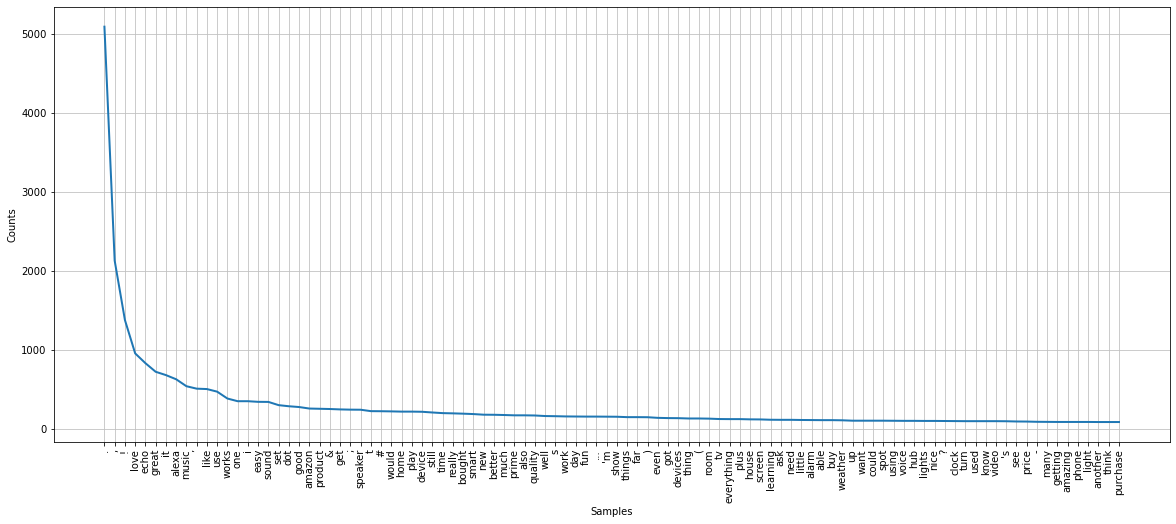

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [42]:
#Frequency Plot for first 100 most frequently occuring words
plt.figure(figsize=(20,8))
frequency_dist.plot(100,cumulative=False)

In [43]:
#### Feature extraction using Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVect=TfidfVectorizer(max_features=1500,stop_words='english')

X=tfidfVect.fit_transform(df['verified_reviews']).toarray()
y=df.iloc[:,4].values
print(tfidfVect.get_feature_names())

['abilities', 'ability', 'able', 'absolutely', 'ac', 'accent', 'access', 'account', 'accounts', 'act', 'activated', 'actually', 'ad', 'adapter', 'add', 'added', 'addicted', 'adding', 'addition', 'additional', 'adequate', 'adjust', 'advanced', 'advantage', 'advertised', 'advertisement', 'advertising', 'advise', 'ago', 'ai', 'al', 'alarm', 'alarms', 'alert', 'alex', 'alexa', 'alexi', 'alexia', 'allow', 'allows', 'amazed', 'amazing', 'amazingly', 'amazon', 'american', 'android', 'annoying', 'answer', 'answered', 'answering', 'answers', 'anticipated', 'anymore', 'anypod', 'anytime', 'apartment', 'app', 'apparently', 'appear', 'appears', 'apple', 'appliances', 'application', 'appointments', 'apps', 'area', 'aren', 'arlo', 'arrived', 'artist', 'ask', 'asked', 'asking', 'asleep', 'aspects', 'assist', 'assistant', 'attached', 'attempt', 'attention', 'attractive', 'audible', 'audio', 'audiobook', 'audiophile', 'automatic', 'automation', 'auxiliary', 'availability', 'available', 'aware', 'away',

In [44]:
#Shape of tfidf vectorizer
X.shape

(3150, 1500)

##Train-Test Split

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, df['rating'], random_state=100, test_size=0.25, stratify=df['rating'])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

## Balance Classes

In [47]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversampler = SMOTE()
X_over, y_over = oversampler.fit_resample(X_train, y_train)
Counter(y_over)

Counter({1: 2173, 0: 2173})

## Model Training

Naive Bayes Model

In [49]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(X_train, y_train)
y_pred=model1.predict(X_test)
#Important Metrics to know the Performance of Model
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
print('Classification Report',classification_report(y_test,y_pred))
print('Confusion Matrix',confusion_matrix(y_test,y_pred))
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Precision Score',precision_score(y_test,y_pred))
print('Recall Score',recall_score(y_test,y_pred))
print('F1 Score',f1_score(y_test,y_pred))

Classification Report               precision    recall  f1-score   support

           0       1.00      0.04      0.08        68
           1       0.92      1.00      0.96       720

    accuracy                           0.92       788
   macro avg       0.96      0.52      0.52       788
weighted avg       0.92      0.92      0.88       788

Confusion Matrix [[  3  65]
 [  0 720]]
Accuracy Score 0.9175126903553299
Precision Score 0.9171974522292994
Recall Score 1.0
F1 Score 0.9568106312292359


In [50]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(model1,X=X_train,y=y_train,cv=5)

array([0.91966173, 0.91966173, 0.92161017, 0.91949153, 0.91949153])

Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
#Important Metrics to know the Performance of Model
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
print('Classification Report',classification_report(y_test,y_pred2))
print('Confusion Matrix',confusion_matrix(y_test,y_pred2))
print('Accuracy Score',accuracy_score(y_test,y_pred2))
print('Precision Score',precision_score(y_test,y_pred2))
print('Recall Score',recall_score(y_test,y_pred2))
print('F1 Score',f1_score(y_test,y_pred2))

Classification Report               precision    recall  f1-score   support

           0       1.00      0.03      0.06        68
           1       0.92      1.00      0.96       720

    accuracy                           0.92       788
   macro avg       0.96      0.51      0.51       788
weighted avg       0.92      0.92      0.88       788

Confusion Matrix [[  2  66]
 [  0 720]]
Accuracy Score 0.916243654822335
Precision Score 0.916030534351145
Recall Score 1.0
F1 Score 0.9561752988047809


In [52]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(model2,X=X_train,y=y_train,cv=5)

array([0.91966173, 0.91966173, 0.92372881, 0.91949153, 0.91949153])

Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
#Important Metrics to know the Performance of Model
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
print('Classification Report',classification_report(y_test,y_pred3))
print('Confusion Matrix',confusion_matrix(y_test,y_pred3))
print('Accuracy Score',accuracy_score(y_test,y_pred3))
print('Precision Score',precision_score(y_test,y_pred3))
print('Recall Score',recall_score(y_test,y_pred3))
print('F1 Score',f1_score(y_test,y_pred3))

Classification Report               precision    recall  f1-score   support

           0       1.00      0.29      0.45        68
           1       0.94      1.00      0.97       720

    accuracy                           0.94       788
   macro avg       0.97      0.65      0.71       788
weighted avg       0.94      0.94      0.92       788

Confusion Matrix [[ 20  48]
 [  0 720]]
Accuracy Score 0.9390862944162437
Precision Score 0.9375
Recall Score 1.0
F1 Score 0.967741935483871


In [54]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(model3,X=X_train,y=y_train,cv=5)

array([0.93023256, 0.93023256, 0.92372881, 0.93220339, 0.92584746])

In [55]:
#Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(x_train, y_train)
y_pred4=model4.predict(X_test)
#Important Metrics to know the Performance of Model
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
print('Classification Report',classification_report(y_test,y_pred4))
print('Confusion Matrix',confusion_matrix(y_test,y_pred4))
print('Accuracy Score',accuracy_score(y_test,y_pred4))
print('Precision Score',precision_score(y_test,y_pred4))
print('Recall Score',recall_score(y_test,y_pred4))
print('F1 Score',f1_score(y_test,y_pred4))

Classification Report               precision    recall  f1-score   support

           0       0.13      0.16      0.15        68
           1       0.92      0.90      0.91       720

    accuracy                           0.84       788
   macro avg       0.53      0.53      0.53       788
weighted avg       0.85      0.84      0.84       788

Confusion Matrix [[ 11  57]
 [ 72 648]]
Accuracy Score 0.8362944162436549
Precision Score 0.9191489361702128
Recall Score 0.9
F1 Score 0.9094736842105264


In [57]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(model4,X=X_train,y=y_train,cv=5)

array([0.92811839, 0.9154334 , 0.89194915, 0.91101695, 0.90042373])

## Conclusion

In [58]:
#After performing preprocessing with the input data removing all the unnecessary values, 
#features are extracted using TFIDF vectorizer. Of all the model that are trained, 
#RandomForest perform the best with 82% accuracy compared to all the other models